In [3]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
# Muat dataset dari file yang sudah diupload
# Upload file CSV Anda di Google Colab atau Google Drive dan gunakan path yang sesuai
file_path = '/content/computed_insight_success_of_active_sellers.csv'  # Sesuaikan path file kamu
data = pd.read_csv(file_path)



In [5]:
# Periksa apakah dataset telah dimuat dengan benar
print(data.head())

                 merchantid  listedproducts  totalunitssold  \
0  5357bcf2bb72c5504882e889               2          120000   
1  5708773c3c02161b3f8c7900               5          107100   
2  5417aada4ad3ab27e954b76c               2          100007   
3  570f3a713a698c14278bb51e               1          100000   
4  53082ea15aefb07dfe1f2a4f               1          100000   

   meanunitssoldperproduct  rating  merchantratingscount  meanproductprices  \
0                  60000.0   4.219              320031.0               9.00   
1                  21420.0   3.934              139223.0               7.76   
2                  50004.0   4.053              108048.0               8.00   
3                 100000.0   3.889               19248.0               5.67   
4                 100000.0   4.036              366898.0               5.00   

   meanretailprices  averagediscount  meandiscount  meanproductratingscount  \
0              20.0             54.0          54.0                 

In [6]:
# Set up visual aesthetics untuk plot
sns.set(style="whitegrid")

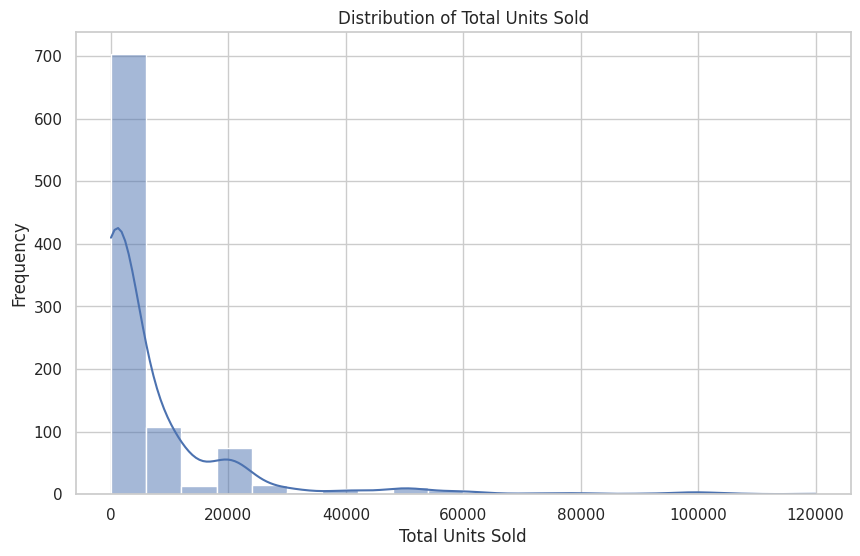

In [7]:
# 1. Distribusi dari total units sold
plt.figure(figsize=(10, 6))
sns.histplot(data['totalunitssold'], bins=20, kde=True)
plt.title('Distribution of Total Units Sold')
plt.xlabel('Total Units Sold')
plt.ylabel('Frequency')
plt.show()

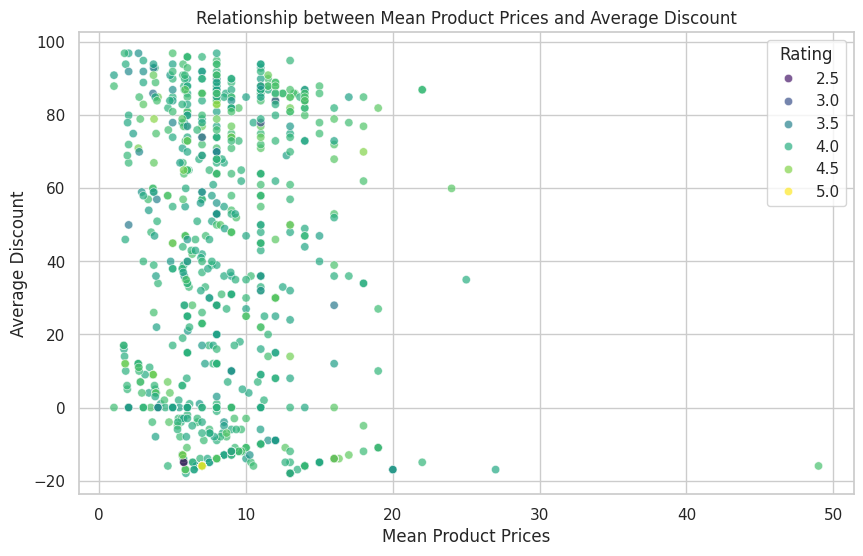

In [8]:
# 2. Scatter plot antara mean product prices dan average discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meanproductprices', y='averagediscount', data=data, hue='rating', palette='viridis', alpha=0.7)
plt.title('Relationship between Mean Product Prices and Average Discount')
plt.xlabel('Mean Product Prices')
plt.ylabel('Average Discount')
plt.legend(title='Rating')
plt.show()

<ipython-input-9-64b856a6fcfe>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='meanunitssoldperproduct', data=data, ci=None, palette='coolwarm')
<ipython-input-9-64b856a6fcfe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='meanunitssoldperproduct', data=data, ci=None, palette='coolwarm')


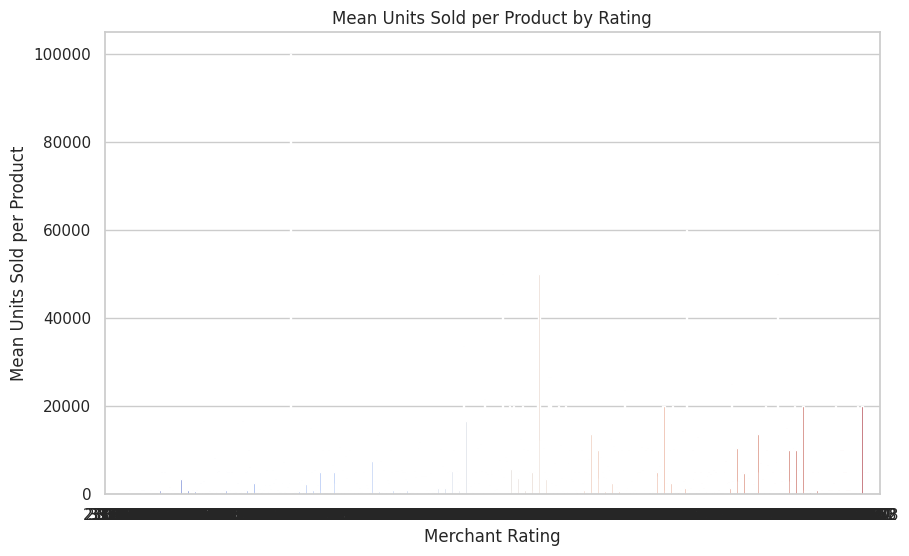

In [9]:
# 3. Barplot mean units sold per product berdasarkan rating merchant
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='meanunitssoldperproduct', data=data, ci=None, palette='coolwarm')
plt.title('Mean Units Sold per Product by Rating')
plt.xlabel('Merchant Rating')
plt.ylabel('Mean Units Sold per Product')
plt.show()

In [10]:
# 4. Insight dari visualisasi yang dihasilkan
# Insight 1: Distribusi total unit terjual memperlihatkan adanya merchant yang menjual dalam jumlah besar
# Insight 2: Korelasi antara harga rata-rata produk dan diskon memperlihatkan hubungan tertentu
# Insight 3: Merchant dengan rating lebih tinggi cenderung memiliki penjualan per produk yang lebih tinggi

In [11]:
# 5. Jenis analisis lain (Bonus)
# Jika ingin melakukan customer segmentation dengan KMeans clustering:
# Memilih fitur untuk clustering (pastikan kolom-kolomnya benar)
features = data[['listedproducts', 'totalunitssold', 'meanunitssoldperproduct', 'rating', 'meanproductprices']]

In [12]:
# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Tambahkan hasil clustering ke dalam data
data['cluster'] = clusters

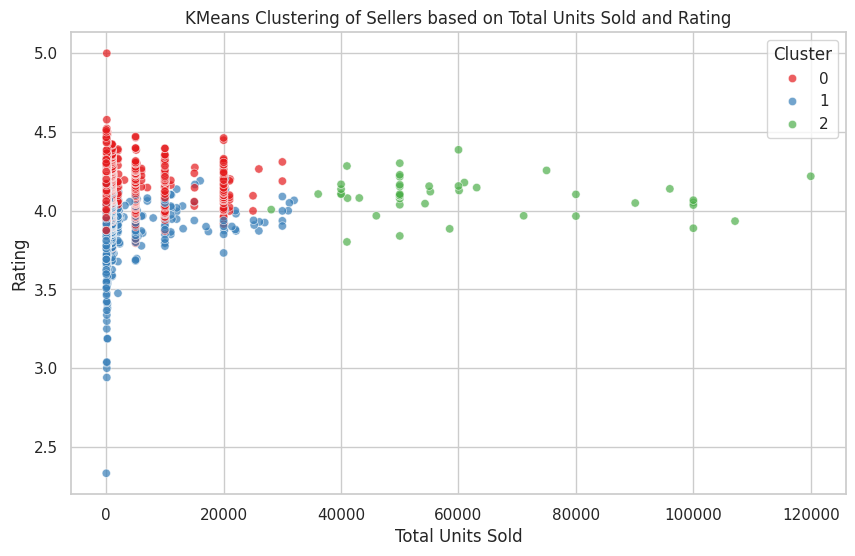

In [15]:
# Visualisasi clustering berdasarkan totalunitssold dan rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalunitssold', y='rating', hue='cluster', palette='Set1', data=data, alpha=0.7)
plt.title('KMeans Clustering of Sellers based on Total Units Sold and Rating')
plt.xlabel('Total Units Sold')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()